<a href="https://colab.research.google.com/github/KuVadym/Data_Science_goit/blob/main/hw9/tensorflow_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
conda install tensorflow

# Создание нейронной сети

В этом задании мы создадим полносвязную нейронную сеть используя при этом низкоуровневые механизмы tensorflow.

Архитектутра нейросети представлена на следующем рисунке. Как видите, в ней имеется один входной слой, два скрытых, а так же выходной слой. В качестве активационной функции в скрытых слоях будет использоваться сигмоида. На выходном слое мы используем softmax.

Часть кода по созданию сети уже написана, от вас требуется заполнить пропуски в указанных местах.

## Архитектура нейронной сети

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>


## О датасете MNIST

Данную нейросеть мы будем обучать на датасете MNIST. Этот датасет представляет собой большое количество изображений рукописных цифр размером $28 \times 28$ пикселей. Каждый пиксель принимает значение от 0 до 255.

Как и раньше датасет будет разеделен на обучающую и тестовую выборки. При этом мы выполним нормализацию всех изображений, чтобы значения пикселей находились в промежутке от 0 до 1, разделив яркость каждого пикселя на 255.

Кроме того, архитектура нейронной сети ожидает на вход вектор. В нашем же случае каждый объект выборки представляет собой матрицу. Что же делать? В этом задании мы "растянем" матрицу $28 \times 28$, получив при этом вектор, состоящей из 784 элементов.

![MNIST Dataset](https://www.researchgate.net/profile/Steven-Young-5/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Больше информации о датасете можно найти [здесь](http://yann.lecun.com/exdb/mnist/).

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_classes = 10 # общее количество классов, в нашем случае это цифры от 0 до 9
num_features = 784 # количество атрибутов входного вектора 28 * 28 = 784

learning_rate = 0.001 # скорость обучения нейронной сети
training_steps = 3000 # максимальное число эпох
batch_size = 256 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов
display_step = 100 # каждые 100 итераций мы будем показывать текущее значение функции потерь и точности

n_hidden_1 = 128 # количество нейронов 1-го слоя
n_hidden_2 = 256 # количество нейронов 2-го слоя

In [ ]:
from tensorflow.keras.datasets import mnist

# Загружаем датасет
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Преобразуем целочисленные пиксели к типа float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

# Перемешаем тренировочные данные
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [ ]:
# Создадим нейронную сеть

class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        self.b = tf.Variable(tf.zeros([out_features]), name="b")

    def __call__(self, x):
        y = tf.matmul(x, self.w) + self.b
        return tf.nn.tanh(y)
 


class NN(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)
    self.layer_1 = DenseLayer(in_features=num_features, out_features=n_hidden_1)
    self.layer_2 = DenseLayer(in_features=n_hidden_1, out_features=n_hidden_2)
    self.layer_3 = DenseLayer(in_features=n_hidden_2, out_features=10)

  def __call__(self, x):
    x = self.layer_1(x)
    x = self.layer_2(x)
    x = self.layer_3(x)
    return tf.nn.softmax(x)

In [ ]:
# В качестве функции ошибки в данном случае удобно взять кросс-энтропию
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)

    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Вычисление кросс-энтропии
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# В качестве метрики качества используем точность
def accuracy(y_pred, y_true):
    m = tf.keras.metrics.Accuracy()
    m.update_state(y_true, tf.math.argmax(y_pred, axis=1))
    return m.result().numpy()

In [ ]:
# print(tf.math.argmax(pred, axis=1))
# print(batch_y)
# m = tf.keras.metrics.Accuracy()
# m.update_state(batch_y, tf.math.argmax(pred, axis=1))
# m.result().numpy()
# print(np.argmax(pred, axis=1)== batch_y)
# print(tf.cast((np.argmax(pred, axis=1) == batch_y), tf.float32))
# print(tf.reduce_sum(tf.cast((np.argmax(pred, axis=1) == batch_y), tf.float32)))
# print(batch_y.shape[0])
# def accuracy_2(y_pred, y_true)

In [ ]:
# Создадим экзампляр нейронной сети
neural_net = NN(name="mnist")

# Функция обучения нейросети
def train(nn, input_x, output_y):
  # Для подгонки весов сети будем использовать стохастический градиентный спуск
  optimizer = tf.optimizers.SGD(learning_rate)

  # Активация автоматического дифференцирования
  with tf.GradientTape() as g:
    pred = neural_net(input_x)
    loss = cross_entropy(pred, output_y)
    grads = g.gradient(loss, nn.trainable_variables)
    optimizer.apply_gradients(zip(grads, nn.trainable_variables))
    # acc = accuracy(pred, batch_y)
    # Модифицируем параметры
    # Место для вашего кода

In [ ]:

# print(pred)
# print(batch_y)
# print(tf.math.argmax(pred[0:255]))
# print(np.argmax(pred[0:10]))
# batch_y

# Новий розділ

In [ ]:
# Тренировка сети

loss_history = []  # каждые display_step шагов сохраняйте в этом список текущую ошибку нейросети
accuracy_history = [] # каждые display_step шагов сохраняйте в этом список текущую точность нейросети

# В этом цикле мы будем производить обучение нейронной сети
# из тренировочного датасета train_data извлеките случайное подмножество, на котором 
# произведется тренировка. Используйте метод take, доступный для тренировочного датасета.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps)):
    train(neural_net, batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        
        loss_history.append(loss)
        accuracy_history.append(acc)


In [ ]:
accuracy_history

[0.12890625,
 0.203125,
 0.359375,
 0.4765625,
 0.54296875,
 0.5390625,
 0.6015625,
 0.64453125,
 0.6328125,
 0.640625,
 0.66796875,
 0.73046875,
 0.75,
 0.734375,
 0.796875,
 0.7421875,
 0.7265625,
 0.73828125,
 0.69140625,
 0.8046875,
 0.76953125,
 0.75390625,
 0.81640625,
 0.7734375,
 0.76953125,
 0.7890625,
 0.80078125,
 0.80859375,
 0.82421875,
 0.83203125]

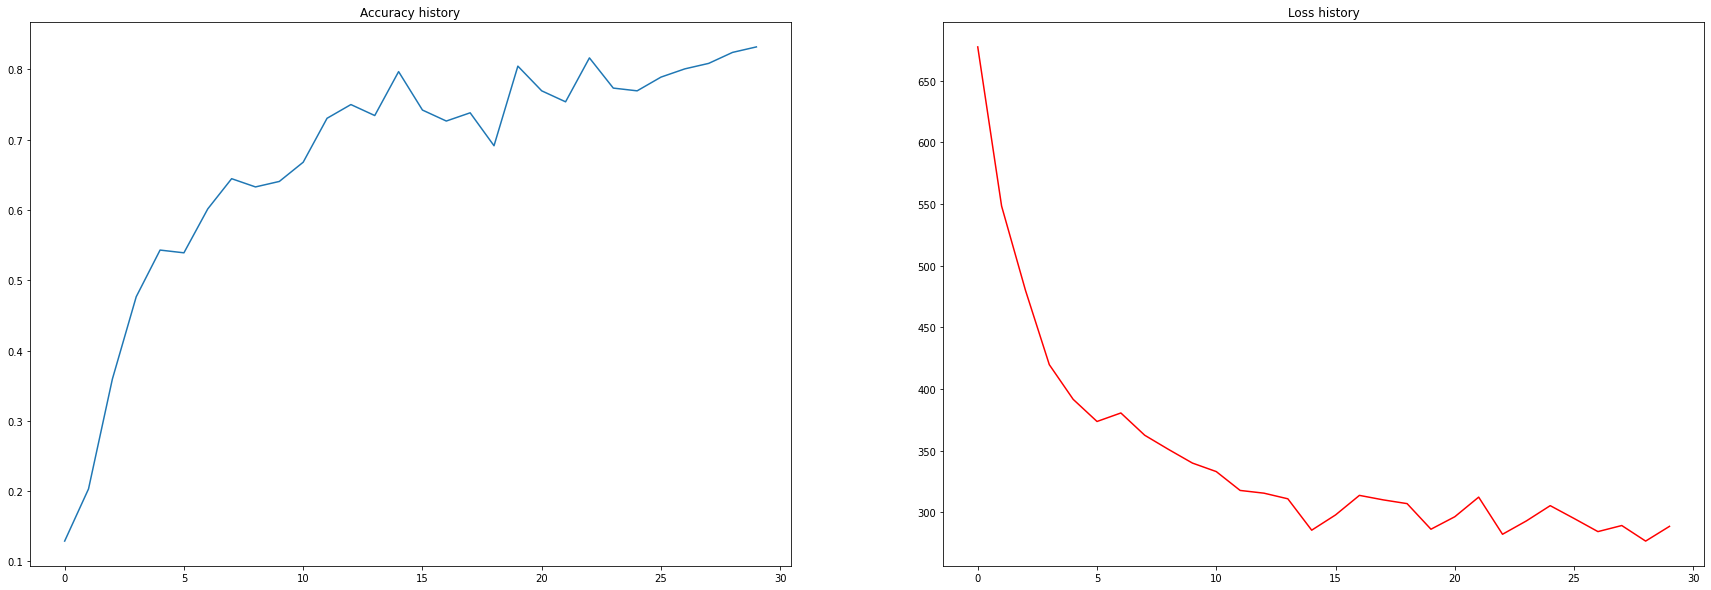

In [ ]:
# Выведите графики зависимости изменения точности и потерь от шага
# Если все сделано правильно, то точность должна расти, а потери уменьшаться
epochs = [i for i in range(30)]

fig, ax = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(30)
ax[0].title.set_text('Accuracy history')
ax[1].title.set_text('Loss history')
ax[0].plot(epochs, accuracy_history)
ax[1].plot(epochs, loss_history, color='red')
# Место для вашего кода

In [ ]:
# Вычислите точность обученной нейросети
pred = neural_net(x_test)
print('Test Accuracy:')
print(accuracy(pred, y_test))

Test Accuracy:
0.801


<ipython-input-67-dab7a98c28a9>:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  my_fin_test = x_test[random_img]
<ipython-input-67-dab7a98c28a9>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  print(f'True labels: {y_test[random_img]}')


Predicted labels: [6 6 6 8 2 0 3 8 7 1]
True labels: [6 0 6 2 2 0 5 2 7 1]


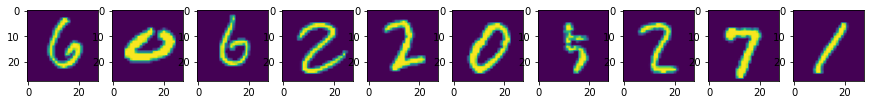

In [ ]:
# Протестируем обученную нейросеть на 10 изображениях. Из тестовой выборки возьмите 5 
# случайных изображений и передайте их в нейронню сеть.
# Выведите изображение и выпишите рядом ответ нейросети.
# Сделайте вывод о том ошибается ли ваша нейронная сеть и если да, то как часто?
n_images = 10
random_img = [np.random.randint(0, 10000, n_images)]
my_fin_test = x_test[random_img]
pred = neural_net(my_fin_test)
print(f'Predicted labels: {np.argmax(pred, axis=1)}')
print(f'True labels: {y_test[random_img]}')

fig, ax = plt.subplots(1, 10)
fig.set_figheight(10)
fig.set_figwidth(15)
for i in range(10):
  ax[i].imshow(my_fin_test[i].reshape(28,28))